# Estimators for $m_A = 3.0$ GeV

In [1]:

path = "/ceph/aavocone/models/"


names = []
train_loss = []
val_loss = []

for files in os.listdir(path):
    if files[0] == "3" and files[-5] == "0":
        model = XGBClassifier()
        model.load_model(f"{path}{files}")
        loss_0 = model.evals_result()["validation_0"]["logloss"]
        names.append(files[9:-4])
        train_loss.append(min(loss_0))

    else:
        pass

print(names)
names = list(map(int,names))

model.load_model("/work/aavocone/models/model500.txt")
LOSS = loss = model.evals_result()["validation_0"]["logloss"]

plt.figure(figsize=(9,6))
x = range(len(loss))
plt.scatter(names, train_loss, marker= "x", label = "new models")
plt.scatter(500,LOSS[-1], marker ="x", label="old model500")
plt.xlabel("number of trees", fontsize = 20)
plt.ylabel("logloss",fontsize=15)
plt.title("minimum Logloss value for $m_{A} = 3.0$ GeV", fontsize = 15)
plt.legend()
#plt.savefig(f"/work/aavocone/week9/log_loss_overview.pdf", format="pdf",bbox_inches="tight")
plt.show()



NameError: name 'XGBClassifier' is not defined

## Comparing different models 
- model500: old, new, increment

 - model1000: standard_train, increment_train, incement_test

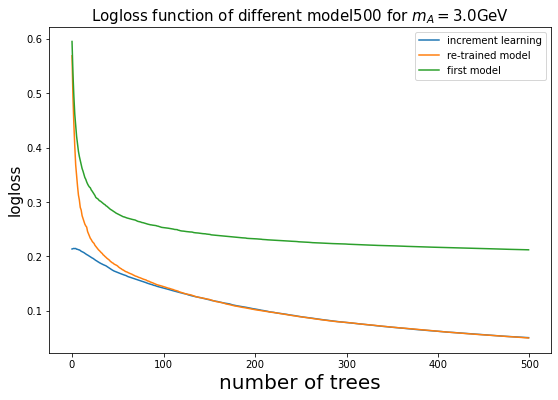

Minimum Logloss value for the different models:
0.050653 0.050068 0.212149


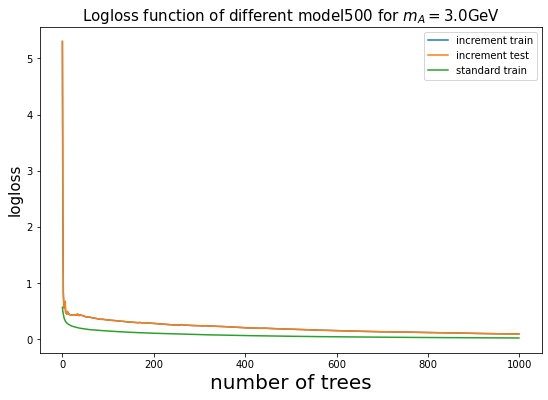

Minimum Logloss value for the different models:
0.092854 0.092854 0.021798


In [ ]:
#--------------------------------------MODEL500--------------------------------------------------------------
model = XGBClassifier()
model.load_model("/work/aavocone/models/3_0_model500_increment_learning.txt")
loss_0 = model.evals_result()["validation_0"]["logloss"]

model.load_model("/ceph/aavocone/models/3_0_model500.txt")
loss_1 = model.evals_result()["validation_0"]["logloss"]

model.load_model("/work/aavocone/models/model500.txt")
loss_2 = model.evals_result()["validation_0"]["logloss"]


plt.figure(figsize=(9,6))
x = range(len(loss_1))
plt.plot(x,loss_0, label = "increment learning")
plt.plot(x,loss_1, label = "re-trained model")
plt.plot(x,loss_2, label = "first model")
plt.xlabel("number of trees", fontsize = 20)
plt.ylabel("logloss",fontsize=15)
plt.title(f"Logloss function of different model500 for $m_A = 3.0$GeV", fontsize = 15)
plt.legend()
plt.savefig(f"/work/aavocone/week9/compare_model500.pdf", format="pdf",bbox_inches="tight")
plt.show()
print("Minimum Logloss value for the different models:")
print(min(loss_0), min(loss_1),min(loss_2))


#-------------------------------------MODEL1000------------------------------------------------------------


model.load_model("/ceph/aavocone/models/3_0_model1000_validation.txt")
loss_0 = model.evals_result()["validation_0"]["logloss"]
loss_1 = model.evals_result()["validation_0"]["logloss"]

model.load_model("/ceph/aavocone/models/3_0_model1000.txt")
loss_2 = model.evals_result()["validation_0"]["logloss"]


plt.figure(figsize=(9,6))
x = range(len(loss_1))
plt.plot(x,loss_0, label = "increment train")
plt.plot(x,loss_1, label = "increment test")
plt.plot(x,loss_2, label = "standard train")
plt.xlabel("number of trees", fontsize = 20)
plt.ylabel("logloss",fontsize=15)
plt.title(f"Logloss function of different model500 for $m_A = 3.0$GeV", fontsize = 15)
plt.legend()
plt.savefig(f"/work/aavocone/week9/compare_model1000.pdf", format="pdf",bbox_inches="tight")
plt.show()
print("Minimum Logloss value for the different models:")
print(min(loss_0), min(loss_1),min(loss_2))





# Log loss function for different $m_A$

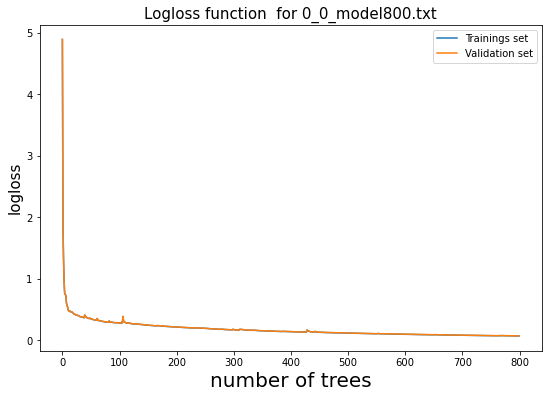

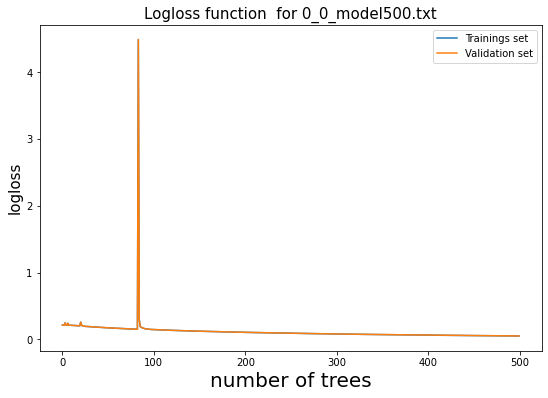

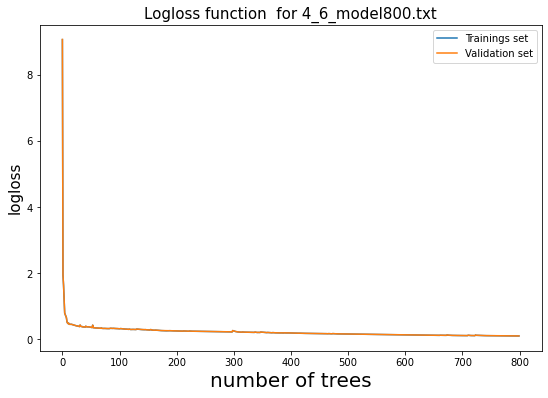

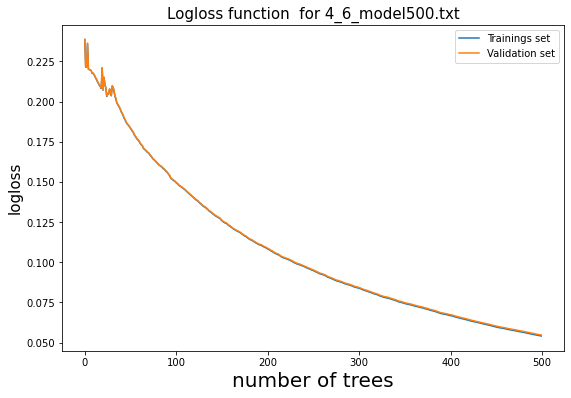

In [ ]:
import os
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import functions as fc
from xgboost import XGBClassifier



path = "/ceph/aavocone/models/"


train_loss = []
val_loss = []
for files in os.listdir(path):
    model = XGBClassifier()
    model.load_model(f"{path}{files}")
    if files[0] != "3":
        loss_0 = model.evals_result()["validation_0"]["logloss"]
        loss_1 = model.evals_result()["validation_1"]["logloss"]
        
        plt.figure(figsize=(9,6))
        x = range(len(loss_1))
        plt.plot(x,loss_0, label = "Trainings set")
        plt.plot(x,loss_1, label = "Validation set")
        #plt.plot(x,val_loss, label = files[4:-4])
        plt.xlabel("number of trees", fontsize = 20)
        plt.ylabel("logloss",fontsize=15)
        plt.title(f"Logloss function  for {files}", fontsize = 15)
        plt.legend()
    else:
        pass
